In [2]:
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [3]:
!dir C:\Users\sde24\Pictures\Posters

 Volume in drive C is OSDisk
 Volume Serial Number is E6EF-BAE1

 Directory of C:\Users\sde24\Pictures\Posters

09-09-18  01:06    <DIR>          .
09-09-18  01:06    <DIR>          ..
01-09-18  17:45            80,391 DN.jpg
01-09-18  17:44           165,568 Drive.jpg
26-08-18  20:54         6,977,201 Habbits.png
01-09-18  17:39            15,109 OMAM_logo_with_band_name.png
01-09-18  17:40            76,316 R-7095541-1433618343-3813.jpeg.jpg
01-09-18  17:41            65,029 Sacred-Games-600x333.png
09-09-18  01:06    <DIR>          ToPrint
09-09-18  01:06           267,922 Whiplash.jpg
               7 File(s)      7,647,536 bytes
               3 Dir(s)  165,190,123,520 bytes free


# Break picture into multiple parts for printing (with optional common margin)

Image shape: (660, 1833, 3)
Recommended parts: 8
Sub pic shape: (343, 495, 3)


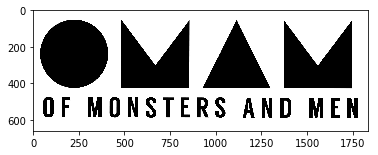

In [18]:
#Print multiple sections
img_name = 'OMAMlogo'
img_path = "C:\\Users\\sde24\\Pictures\\Posters\\"+img_name+".jpg"
output_path = "C:\\Users\\sde24\\Pictures\\Posters\\ToPrint\\"
no_of_sub_pics = 8

global j;j=0
img = mpimg.imread(img_path)
h,l,d=img.shape
print('Image shape:',(h,l,d))
print('Recommended parts:',int(math.pow(2,math.log(h*l//(400*250),2)//1)))

def sub_pic(img,no_of_sub_pics,margin=0.02,save_sub_parts=False): #takes a picture to break it into sub parts with margins
    global j
    h,l,d=img.shape
    if math.log(no_of_sub_pics,2)%2 == 0:
        if no_of_sub_pics != 1:
            h = int(h//2+round(margin*h,0))
            l = int(l//2+round(margin*l,0))
            sub_pic(img[:h,:l,:],no_of_sub_pics//4,save_sub_parts=save_sub_parts)
            sub_pic(img[:h,-l:,:],no_of_sub_pics//4,save_sub_parts=save_sub_parts)
            sub_pic(img[-h:,:l,:],no_of_sub_pics//4,save_sub_parts=save_sub_parts)
            sub_pic(img[-h:,-l:,:],no_of_sub_pics//4,save_sub_parts=save_sub_parts)
        else:
            if save_sub_parts or (not j):
                mpimg.imsave(output_path+img_name+'_part'+str(j+1)+'.jpg',img)
            j +=1
    else:
        if h > l: #break the picture on the longer axis
            h = int(h//2+int(margin*h))
            sub_pic(img[:h,:,:],no_of_sub_pics//2)
            sub_pic(img[-h:,:,:],no_of_sub_pics//2)
        else:
            l = int(l//2+int(margin*l))
            sub_pic(img[:,:l,:],no_of_sub_pics//2,save_sub_parts=save_sub_parts)
            sub_pic(img[:,-l:,:],no_of_sub_pics//2,save_sub_parts=save_sub_parts)
# sub_pic(img,no_of_sub_pics)
sub_pic(img,no_of_sub_pics,save_sub_parts=True)
print('Sub pic shape:',mpimg.imread(output_path+img_name+"_part1.jpg").shape)
plt.imshow(mpimg.imread(img_path))

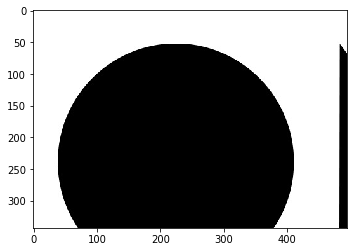

In [19]:
plt.imshow(mpimg.imread(output_path+img_name+"_part1.jpg"))

# Art Project on rolled paper

In [8]:
# functions required for trim
def trim_image(img,trim='m',guide_lines=False,maintain_aspect_ratio=True,verbose=False):
    if verbose:
        print('Input image shape for trimming',img.shape)
    if try_to_retain == 'H': #pixel length along other axis to maintain a4 page aspect ratio
        h = int((img.shape[0]//(2*R+gap))*(2*R+gap))
        if pic_mode == 'P':
            l = int(round(h/1.414,0))
        else:
            l = int(round(h*1.414,0))
    else:
        l = img.shape[1]
        if pic_mode == 'P':
            h = int(round(l*1.414,0))
        else:
            h = int(round(l/1.414,0))
        h = int((h//(2*R+gap))*(2*R+gap))
    if verbose:
        print('To maintain aspect size of mode',pic_mode,'retaing',try_to_retain,'the length should be',l,'and height should be',h)
    img_out = img.copy()   
    if maintain_aspect_ratio:
        if l>img_out.shape[1]:
            delta = (l-img_out.shape[1])
            buf = delta//2
            margin = img_out.copy()
            for i in range(delta//img_out.shape[1]):
                margin = np.concatenate((margin,img_out),axis=1)
            margin = margin[:delta,:,:]
            margin[:,:,:] = 255
            img_out = np.concatenate((margin,img_out,margin),axis=1)
        if h>img_out.shape[0]:
            delta = (h-img_out.shape[0])
            buf = delta//2
            margin = img_out.copy()
            for i in range(delta//img_out.shape[0]):
                margin = np.concatenate((margin,img_out),axis=0)
            margin = margin[:delta,:,:]
            margin[:,:,:] = 255
            img_out = np.concatenate((margin[:buf,:,:],img_out,margin[buf:delta,:,:]),axis=0)
        if h<img_out.shape[0]:
            buf = (img_out.shape[0]-h)//2
            if trim == 'm':
                img_out = img_out[buf:buf+h,:,:]
            elif trim == 't':
                img_out = img_out[:h,:,:]
            else:
                img_out = img_out[-h:,:,:]                
        if l<img_out.shape[1]:
            buf = (img_out.shape[1]-l)//2
            if trim == 'm':
                img_out = img_out[:,buf:-buf,:]
            elif trim == 't':
                img_out = img_out[:,:-2*buf,:]
            else:
                img_out = img_out[:,2*buf:,:]
    if verbose:
        print('Image size after aspect ratio correction/trimming:',img_out.shape)
    if guide_lines:
        len_line = int(round(.02*img_out.shape[1],0))
        margin = img_out[:,:len_line,:].copy()
        margin[:,:,:] = 255
        for i in range(img.shape[0]//(2*R+gap)):          
            try:
                margin[i*2*R+i*gap,:,:] = 200
                margin[i*2*R+i*gap+R,:,:] = 200
                margin[i*2*R+i*gap+2*R,:,:] = 200
            except:
                continue
        if maintain_aspect_ratio:
            img_out = np.concatenate((margin,img_out[:,len_line:-len_line,:],margin),axis=1)
        else:
            img_out = np.concatenate((margin,img_out[:,:,:],margin),axis=1)
    return img_out
    
def expand_image(img,invert=False):
    assert img.shape[0]==R
    img_out = np.concatenate((img.copy(),img.copy()),axis=0)
    if invert:
        for i in range(2*R):
            img_out[i,:,:] = img[map_pix_i[i],:,:]
    else:        
        for i in range(2*R):
            img_out[i,:,:] = img[map_pix[i],:,:]
    return img_out

def cut_expand_append(img,guide_lines=True,maintain_aspect_ratio=True,verbose=False):
    h,l,d = img.shape
    assert h%(2*R+gap) == 0
    h_out = (h//(2*R+gap))*(4*R+gap)
    if verbose:
        print('Input image size for cut expand append:',img.shape)
        print('Output image size for cut expand append should be:',(h_out,l,d))
    img_out = np.concatenate((img,img[:h_out-h,:,:]),axis=0)
    img_out[:,:,:] = 255
    for i in range(h//(2*R+gap)):
        pin = int(i*(gap+2*R))
        pin_out = int(i*(gap+4*R))
        img_out[pin_out:pin_out+2*R,:,:] = expand_image(img[pin:pin+R,:,:])
        img_out[pin_out+2*R:pin_out+2*R+2*R,:,:] = expand_image(img[pin+R:pin+R+R,:,:],invert=True)
        img_out[pin_out+2*R+2*R:pin_out+2*R+2*R+gap,:,:] = img[pin+R+R:pin+R+R+gap,:,:]
    if guide_lines:
        len_line = int(round(.02*img_out.shape[1],0))
        margin = img_out[:,:len_line,:].copy()
        margin[:,:,:] = 255
        if verbose:
            print('Margin shape:',margin.shape)
        for i in range(h//(2*R+gap)): 
            pin_out = int(i*(gap+4*R))
            margin[pin_out,:,:] = 200
            margin[pin_out+2*R,:,:] = 200
            margin[pin_out+4*R,:,:] = 200
        if maintain_aspect_ratio:
            img_out = np.concatenate((margin,img_out[:,len_line:-len_line,:],margin),axis=1)
        else:
            img_out = np.concatenate((margin,img_out[:,:,:],margin),axis=1)
    if verbose:
        print('Final output image size:',img_out.shape)
    return img_out

R: 5 | gap: 1 | (2R+gap): 11
Ratio of distance_between/gap_between changed from  15.0 ---> 11.0
No of rolls required: 58
Input picture shape: (325, 600, 3)
Output picture shape: (609, 226, 3)


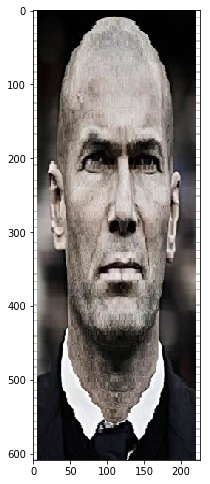

In [11]:
distance_between = 15 #Distance between axis of two rolled paper in mm, integer preferred
gap_between = 1 #average gap between two rolled paper in mm, integer preffered
preferred_pic_size = 'A3'
print_sheet = 'A4'
pic_mode = 'P'
try_to_retain = 'H'
img_name = 'Zinedine'
img_path = 'C:\\Users\\sde24\\Documents\\Surya\\Art Projects\\InputImages\\'+img_name+'.jpg'
out_path = 'C:\\Users\\sde24\\Documents\\Surya\\Art Projects\\Output\\'
verbose=False
save_output = True

img = mpimg.imread(img_path)
page_size = {'A4':(297,210),'A3':(420,297)}
if (distance_between-gap_between)%2 == 1:
    print('Even number preferred for distance_between-gap_between')
if try_to_retain == 'H':
    if pic_mode == 'P':
        R = ((distance_between-gap_between)/2)/page_size[preferred_pic_size][0]*img.shape[0]
        gap = gap_between/page_size[preferred_pic_size][0]*img.shape[0]
    else:
        R = ((distance_between-gap_between)/2)/page_size[preferred_pic_size][1]*img.shape[0]
        gap = gap_between/page_size[preferred_pic_size][1]*img.shape[0]
else:
    if pic_mode == 'P':
        R = ((distance_between-gap_between)/2)/page_size[preferred_pic_size][0]*img.shape[1]
        gap = gap_between/page_size[preferred_pic_size][0]*img.shape[1]
    else:
        R = ((distance_between-gap_between)/2)/page_size[preferred_pic_size][1]*img.shape[1]
        gap = gap_between/page_size[preferred_pic_size][1]*img.shape[1]
R=int(round(R,0));gap=int(round(gap,0))
print('R:',R,'| gap:',gap,'| (2R+gap):',2*R+gap)
assert R > 0;assert gap > 0
print('Ratio of distance_between/gap_between changed from ',distance_between/gap_between,'--->',(2*R+gap)/gap)

# compute the curve mapping of pixels for straight and reverse order
map_pix = np.zeros(2*R,dtype=int)
map_pix_i = np.zeros(2*R,dtype=int)
for x in range(2*R):
    if x<=int(round(R*(2-math.pi/2),0)):
        map_pix[x] = int(0)
        map_pix_i[2*R-x-1] = R-1-map_pix[x]
    else:
        map_pix[x] = int(round(R-R*math.sin(2-x/R),0))
        map_pix_i[2*R-x-1] = R-1-map_pix[x]
        
img_out = cut_expand_append(trim_image(img,verbose=verbose),verbose=verbose)
print('No of rolls required:',img_out.shape[0]//(4*R+gap)*2)
plt.figure(figsize=(11.69*2,8.27))
plt.imshow(img_out)
print('Input picture shape:',img.shape)
print('Output picture shape:',img_out.shape)
j=0
if save_output:
    if preferred_pic_size=='A3' and print_sheet=='A4': 
        h = img_out.shape[1]
        v = int(h/1.414)
    elif preferred_pic_size=='A4' and print_sheet=='A4':
        h = img_out.shape[1]
        v = int(h*1.414)
    else:
        print('Input or code proper sheet size')
    for vi in range(img_out.shape[0]//v+1):
        for hi in range(img_out.shape[1]//h):
            upper_pin = v*vi
            lower_pin = v*vi+v+int(.05*v)
            if lower_pin>img_out.shape[0]:
                lower_pin = img_out.shape[0]
                upper_pin = max(lower_pin - v,0)
            left_pin = h*hi
            right_pin = h*hi+h
            if right_pin>img_out.shape[1]:
                right_pin = img_out.shape[1]
                left_pin = max(right_pin - h,0)
            mpimg.imsave(out_path+img_name+'_part'+str(j+1)+'.jpg',img_out[upper_pin:lower_pin,left_pin:right_pin,:])              
            j+=1

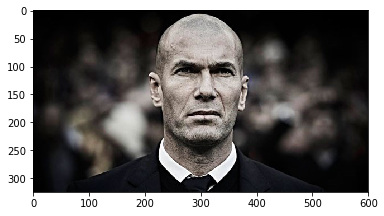

In [425]:
plt.imshow(img)

# Convet to black and white

In [12]:
from PIL import Image
for i in range(j):
    img_name='Zinedine_part'+str(i+1)
    img_path = out_path+img_name+'.jpg'
    image_file = Image.open(img_path) # open colour image
    image_file = image_file.convert('L') # convert image to black and white
    image_file.save(out_path+img_name+'BW.jpg')